# Week 5 - Example 2

To demonstrate the use of an in-built, pre-trained network in Keras, we’ll use VGG16 to classify some images taken
from the web.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

np.set_printoptions(suppress=True)

Next we’ll create a function that can read in a web link to an image, download it, then save it as an opencv
an image we can use,


In [2]:
import urllib
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    # return the image
    return image

To implement the VGG16 model we need to import the keras module and some tools to pre-process input
images and post-process output results

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

Now, we can load the deep learning model. When we do this for the first time, Keras will download the
weights files from GitHub and save them locally

In [4]:
model = VGG16()

2023-06-07 17:39:49.601757: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 17:39:50.161047: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10794 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


553476096/553467096 [==============================] - 19s 0us/step


In [5]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Next, we’ll take an image we’ve found online and see what the network thinks it is

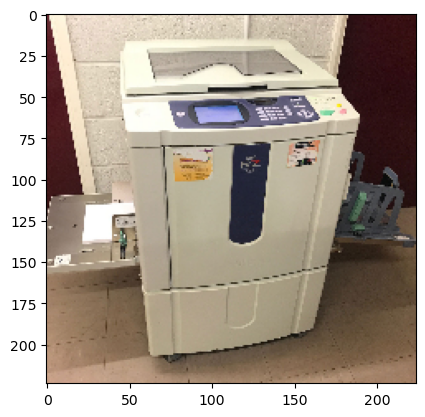

In [6]:
# an image of a photocopier
copier = url_to_image('https://elmstok.co.uk/images/' +
                            'second-hand-risograph-rz-970e-copier-machine.jpg')

# we have to resize the image to be 224x224 as this
# is the size of the images VGG16 can process
image = cv2.resize(copier, (224,224))

# we'll show the image to see what it looks like
im = plt.imshow(image)
plt.grid(False)
plt.show()

Before we classify, we have to pre-process using a Keras function. This will normalize the image so that
the input is in the same range as the images that the network was originally trained on,

In [7]:
image = preprocess_input(image)

Keras is ready to classify a whole list of images,
not just one

In [8]:
# we expand the first dimension of the array like this:
image[None,:].shape

(1, 224, 224, 3)

In [9]:
#If we predict the contents of the image in this way then the input will match the shape that the network
#expects
prediction = model.predict(image[None,:],verbose=0)

2023-06-07 17:44:36.186994: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-06-07 17:44:36.412940: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 3.7
2023-06-07 17:44:36.412971: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-06-07 17:44:36.413042: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


We can use the Keras decoder function to calculate the top 5 most likely classifications and convert the
index of the array into the human-readable label:

In [10]:
labels = decode_predictions(prediction,top=5)[0]

for l in labels:
    print('%s (%.2f%%)' % (l[1], l[2]*100))

49152/35363 [=========================================] - 0s 0us/step
photocopier (95.81%)
washer (1.98%)
cash_machine (0.81%)
printer (0.73%)
ashcan (0.58%)
